In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from sklearn.metrics import r2_score

# XGBoost import
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import pickle

# grid_cv import
from sklearn.model_selection import GridSearchCV

# 최대 재귀함수 깊이 설정
import sys
sys.setrecursionlimit(10**7)

# timedelta import
from datetime import timedelta

# datetime import
from datetime import datetime


In [39]:
df= pd.read_csv('data/price/price_baechoo.csv')
# df 구분 인덱스로 설정
df.set_index('구분', inplace=True)

# 평균 컬럼 가격 컬럼으로 변경
df.rename(columns={'평균':'가격'}, inplace=True)

df

,가격
구분,
2000-01-03,5600.0
2000-01-04,5600.0
2000-01-05,5620.0
2000-01-06,5700.0
2000-01-07,5670.0
...,...
2022-12-14,5430.5
2022-12-15,5430.5
2022-12-16,5304.0


5개 데이터가 하나로 묶이는 방식 

In [41]:
num_list= []
for i in range(1,1179):
    num_list.append(i*3)
    num_list.append(i*3)
    
price_open=[]
price_high=[]
price_low= []
price_close= []
for i in range(len(num_list)):
    if i==0:
        test_df= df.iloc[0:num_list[i]]
    else:
        test_df= df.iloc[num_list[i-1]:num_list[i]]
    price_open.append(test_df.iloc[0]['가격'])
    max= test_df.iloc[0]['가격']
    min= test_df.iloc[0]['가격']
    for i in range(len(test_df)):
        if test_df.iloc[i]['가격'] > max:
            max= test_df.iloc[i]['가격']
        if test_df.iloc[i]['가격'] < min:
            min= test_df.iloc[i]['가격']
    price_high.append(max)
    price_low.append(min)
    price_close.append(test_df.iloc[len(test_df)-1]['가격'])

    

IndexError: single positional indexer is out-of-bounds

/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.draw()
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.draw()
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Person Correlation of Features'}>

/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/IPython/core/pylabtools.p

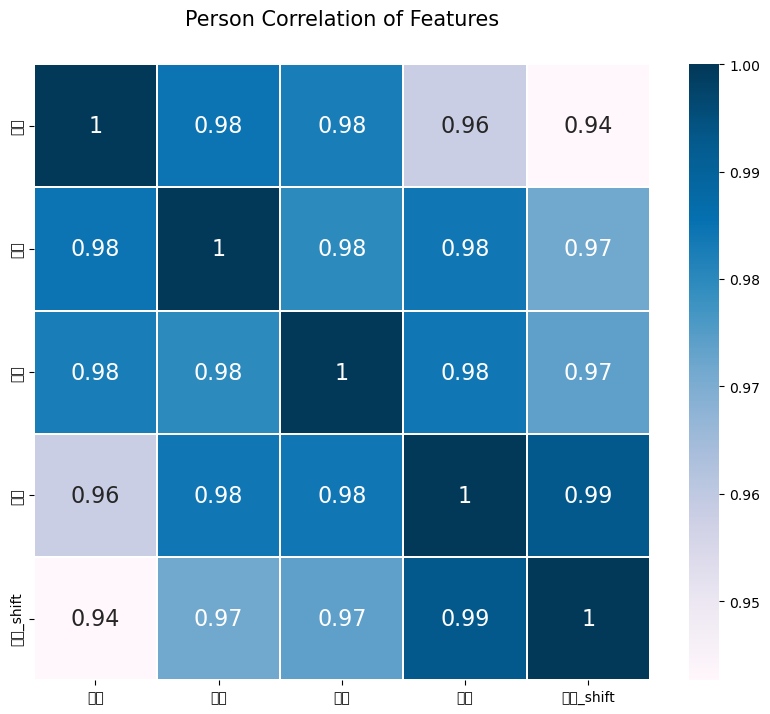

In [7]:
import seaborn as sns

heatmap_data= candle_df[['시가', '고가', '저가', '종가', '종가_shift']]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [8]:
feature= candle_df[['시가', '고가', '저가','종가']]
target= candle_df[['종가_shift']]

# feature, target 데이터 스케일링
scaler1= MinMaxScaler()
scaler2= MinMaxScaler()

feature_sc= scaler1.fit_transform(feature)
target_sc= scaler2.fit_transform(target)

feature_sc= pd.DataFrame(feature_sc, columns=feature.columns, index=feature.index)
target_sc= pd.DataFrame(target_sc, columns=target.columns, index=target.index)

In [9]:
#  train, test 데이터 분리
train_X, test_X, train_y, test_y= train_test_split(feature_sc, target_sc, test_size=0.2, shuffle=False)

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (4447, 4) (4447, 1)
테스트 데이터의 크기 : (1112, 4) (1112, 1)


In [10]:
#find best params for XGBoost ,XGBoost 모델을 만든다
xgb = XGBRegressor()

# XGBoost 모델의 하이퍼파라미터를 설정한다
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 1],
    'subsample': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# XGBoost 모델의 하이퍼파라미터를 최적화한다
grid_cv = GridSearchCV(xgb, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(train_X, train_y)

# 최적의 하이퍼파라미터를 출력한다
print('최적의 하이퍼파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼파라미터: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 0.01, 'subsample': 1}
최고 예측 정확도: 0.9789


In [11]:
# 최적의 하이퍼파라미터를 사용하여 XGBoost 모델을 만든다
xgb = XGBRegressor(n_estimators=grid_cv.best_params_['n_estimators'],
                  learning_rate=grid_cv.best_params_['learning_rate'],   
                  max_depth=grid_cv.best_params_['max_depth'],
                  colsample_bytree=grid_cv.best_params_['colsample_bytree'],
                  subsample=grid_cv.best_params_['subsample'],
                  reg_alpha=grid_cv.best_params_['reg_alpha'],
                  reg_lambda=grid_cv.best_params_['reg_lambda'])

# XGBoost 모델을 학습한다
xgb.fit(train_X, train_y)

# XGBoost 모델을 평가한다
y_pred = xgb.predict(test_X)
print('XGBoost 모델의 RMSE:', np.sqrt(mean_squared_error(test_y, y_pred)))

# r2_score
print('XGBoost 모델의 r2_score:', r2_score(test_y, y_pred))


XGBoost 모델의 RMSE: 0.026250824489261172
XGBoost 모델의 r2_score: 0.9675087963649238


In [12]:
# 모델 저장
pickle.dump(xgb, open('model/xgb_model_s2s_300.pkl', 'wb'))

# scaler 저장
pickle.dump(scaler1, open('model/scaler1_300.pkl', 'wb'))
pickle.dump(scaler2, open('model/scaler2_300.pkl', 'wb'))


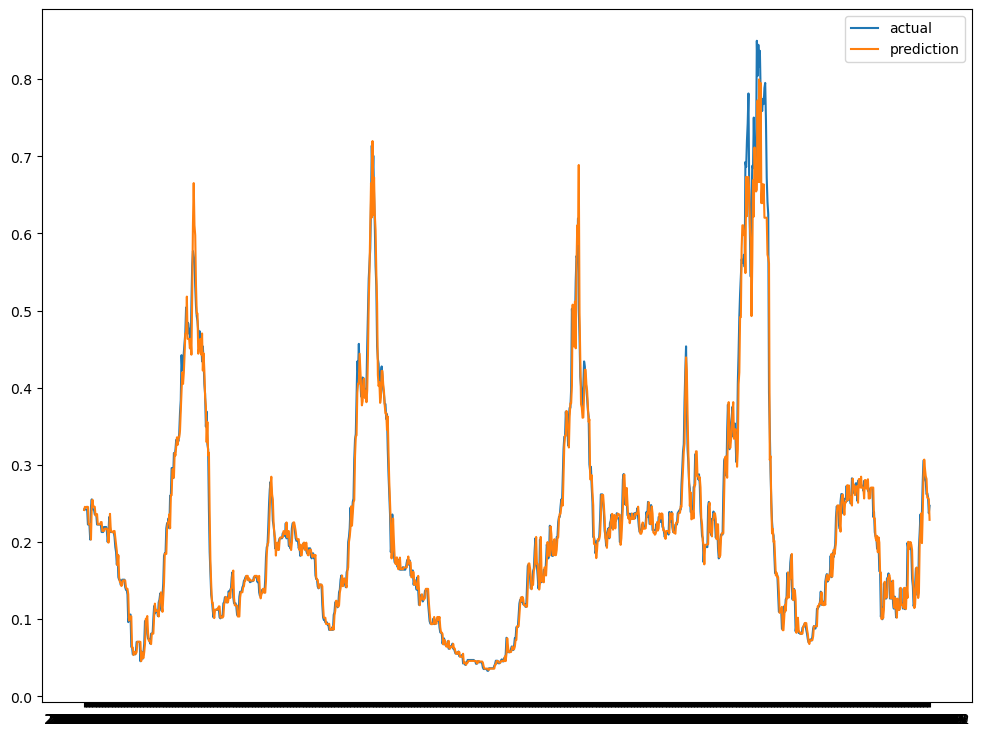

In [13]:
# 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_y, label='actual')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()




Make new data

In [14]:
candle_df_all

,시가,고가,저가,종가,종가_shift
날짜,,,,,
2000-01-07,5600.0,5700.0,5600.0,5670.0,5770.0
2000-01-08,5600.0,5770.0,5600.0,5770.0,5790.0
2000-01-10,5620.0,5790.0,5620.0,5790.0,5740.0
2000-01-11,5700.0,5790.0,5670.0,5740.0,5630.0
2000-01-12,5670.0,5790.0,5630.0,5630.0,5630.0
...,...,...,...,...,...
2021-08-09,11150.0,11150.0,9805.0,9805.0,9845.0
2021-08-10,10750.0,10750.0,9805.0,9845.0,9685.0
2021-08-11,10380.0,10380.0,9685.0,9685.0,9050.0


In [15]:
test_data = pd.DataFrame(columns=['시가', '고가', '저가','종가'])

# "시가"= 8172.0, "고가"= 8252.0, "저가"= 7792.5, "종가"= 7792.5
test_data.loc[0] = [8172.0, 8252.0, 7792.5, 7792.5]

test_data

,시가,고가,저가,종가
0,8172.0,8252.0,7792.5,7792.5


In [16]:
model = pickle.load(open('model/xgb_model_s2s_300.pkl', 'rb'))
scaler1 = pickle.load(open('model/scaler1_300.pkl', 'rb'))
scaler2 = pickle.load(open('model/scaler2_300.pkl', 'rb'))

# model predict using test_data
test_data_sc = scaler1.transform(test_data)
test_data_sc = pd.DataFrame(test_data_sc, columns=test_data.columns, index=test_data.index)
y_pred = model.predict(test_data_sc)
# reshape
y_pred = y_pred.reshape(-1, 1)
# inverse transform
y_pred = scaler2.inverse_transform(y_pred)
y_pred
# 10월 31일 
# 11월 1일 실제 가격 7350.0

array([[7877.1743]], dtype=float32)

In [17]:
y_pred[0]

array([7877.1743], dtype=float32)

In [18]:
new= df_train.tail(5)

# df_test 인덱스를 가져온다
index = df_test.index

# df_test copy
df_test_copy = df_test.copy()

# dataframe을 만든다 컬럼 
df_test_copy = pd.DataFrame(columns=['가격'], index=index)
df_test_copy = pd.concat([df_test_copy, new], axis=0).sort_index()

# df_test_copy date index를 datetime으로 변환
df_test_copy.index = pd.to_datetime(df_test_copy.index)
df_test_copy

,가격
구분,
2022-10-25,8172.0
2022-10-26,8072.0
2022-10-27,8252.0
2022-10-28,7916.0
2022-10-31,7792.5
2022-11-01,NaN
2022-11-02,NaN
2022-11-03,NaN
2022-11-04,NaN


In [19]:
new_test= df_train.tail(5)

# df_test 인덱스를 가져온다
index = df_test.index

# df_test copy
df_test_copy_test = df_test.copy()

# dataframe을 만든다 컬럼 
df_test_copy_test = pd.DataFrame(columns=['가격'], index=index)
df_test_copy_test = pd.concat([df_test_copy_test, new_test], axis=0).sort_index()

# df_test_copy_test date index를 datetime으로 변환
df_test_copy_test.index = pd.to_datetime(df_test_copy_test.index)

df_test_copy_test= df_test_copy_test.reset_index()
df_test_copy_test

,구분,가격
0,2022-10-25,8172.0
1,2022-10-26,8072.0
2,2022-10-27,8252.0
3,2022-10-28,7916.0
4,2022-10-31,7792.5
5,2022-11-01,NaN
6,2022-11-02,NaN
7,2022-11-03,NaN
8,2022-11-04,NaN
9,2022-11-07,NaN


In [20]:
test_data= pd.DataFrame(columns=['시가', '고가', '저가', '종가'])
test_data.loc[0] = [8172.0, 8252.0, 7792.5, 7792.5]
test_data.loc[1]= [8072, 8252, 7792.5, 5000.4243]



# model predict using test_data
test_data_sc = scaler1.transform(test_data)
test_data_sc = pd.DataFrame(test_data_sc, columns=test_data.columns, index=test_data.index)
y_pred = model.predict(test_data_sc)
# reshape
y_pred = y_pred.reshape(-1, 1)
# inverse transform
y_pred = scaler2.inverse_transform(y_pred)
y_pred

array([[7877.1743],
       [4788.4727]], dtype=float32)

In [21]:
candle_test= pd.DataFrame(columns=['시가', '고가', '저가', '종가', '종가_shift'])

candle_test.loc[0, '시가'] = df_test_copy_test.loc[0, '가격']
candle_test.loc[0, '고가'] = df_test_copy_test.loc[0:4, '가격'].max()
candle_test.loc[0, '저가'] = df_test_copy_test.loc[0:4, '가격'].min()
candle_test.loc[0, '종가'] = df_test_copy_test.loc[4, '가격']


candle_test_data= candle_test.iloc[0][['시가', '고가', '저가', '종가']]
# print(candle_test_data)
# candle_test_data reshape
candle_test_data = candle_test_data.values.reshape(1, -1)
new_candle_test_sc = scaler1.transform(candle_test_data)
new_candle_test_sc = pd.DataFrame(new_candle_test_sc, columns=['시가', '고가', '저가', '종가'])
print(new_candle_test_sc)

# # float64로 변환
# new_candle_test = new_candle_test.astype('float64')
y_pred = model.predict(new_candle_test_sc)
# # reshape
y_pred = y_pred.reshape(-1, 1)
# # inverse transform
y_pred = scaler2.inverse_transform(y_pred)
print(y_pred)
# y_pred
candle_test.loc[0]['종가_shift'] = y_pred[0][0]
df_test_copy_test.loc[5, '가격']= y_pred[0][0]

candle_test.loc[1, '시가'] = df_test_copy_test.loc[1, '가격']
candle_test.loc[1, '고가'] = df_test_copy_test.loc[1:5, '가격'].max()
candle_test.loc[1, '저가'] = df_test_copy_test.loc[1:5, '가격'].min()
candle_test.loc[1, '종가'] = df_test_copy_test.loc[5, '가격']

candle_test_data= candle_test.iloc[1][['시가', '고가', '저가', '종가']]
# print(candle_test_data)
# candle_test_data reshape
candle_test_data = candle_test_data.values.reshape(1, -1)
new_candle_test_sc = scaler1.transform(candle_test_data)
new_candle_test_sc = pd.DataFrame(new_candle_test_sc, columns=['시가', '고가', '저가', '종가'])
print(new_candle_test_sc)

# # float64로 변환
# new_candle_test = new_candle_test.astype('float64')
y_pred = model.predict(new_candle_test_sc)
# # reshape
y_pred = y_pred.reshape(-1, 1)
# # inverse transform
y_pred = scaler2.inverse_transform(y_pred)
print(y_pred)
# y_pred
candle_test.loc[1]['종가_shift'] = y_pred[0][0]
df_test_copy_test.loc[6, '가격']= y_pred[0][0]


         시가        고가        저가        종가
0  0.208846  0.210677  0.226735  0.196504
[[7877.1743]]
         시가        고가        저가        종가
0  0.205593  0.210677  0.226735  0.199258
[[7877.1743]]


/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
candle_test

,시가,고가,저가,종가,종가_shift
0,8172.0,8252.0,7792.5,7792.5,7877.174316
1,8072.0,8252.0,7792.5,7877.174316,7877.174316


In [23]:

# 위의 코드를 함수로 만들어서 반복문으로 돌리기
for i in range(2, 30):
    candle_test.loc[i, '시가'] = df_test_copy_test.loc[i, '가격']
    candle_test.loc[i, '고가'] = df_test_copy_test.loc[i:i+4, '가격'].max()
    candle_test.loc[i, '저가'] = df_test_copy_test.loc[i:i+4, '가격'].min()
    candle_test.loc[i, '종가'] = df_test_copy_test.loc[i+4, '가격']

    candle_test_data= candle_test.iloc[i][['시가', '고가', '저가', '종가']]
    # print(candle_test_data)
    # candle_test_data reshape
    candle_test_data = candle_test_data.values.reshape(1, -1)
    new_candle_test_sc = scaler1.transform(candle_test_data)
    new_candle_test_sc = pd.DataFrame(new_candle_test_sc, columns=['시가', '고가', '저가', '종가'])
    print(new_candle_test_sc)

    # # float64로 변환
    # new_candle_test = new_candle_test.astype('float64')
    y_pred = model.predict(new_candle_test_sc)
    # # reshape
    y_pred = y_pred.reshape(-1, 1)
    # # inverse transform
    y_pred = scaler2.inverse_transform(y_pred)
    print(y_pred)
    # y_pred
    candle_test.loc[i]['종가_shift'] = y_pred[0][0]
    df_test_copy_test.loc[i+5, '가격']= y_pred[0][0]


         시가        고가        저가        종가
0  0.211447  0.210677  0.226735  0.199258
[[7877.1743]]
        시가       고가        저가        종가
0  0.20052  0.19974  0.226735  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.196504  0.198476  0.226735  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가        저가        종가
0  0.199258  0.198476  0.229913  0.199258
[[7877.1743]]
         시가        고가   

/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/bagjeonghyeon/miniforge3/envs/baseDeep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler wa

In [24]:
# df_test_copy_test(head 10)
df_test_copy_test.head(30)

,구분,가격
0,2022-10-25,8172.000000
1,2022-10-26,8072.000000
2,2022-10-27,8252.000000
3,2022-10-28,7916.000000
4,2022-10-31,7792.500000
5,2022-11-01,7877.174316
6,2022-11-02,7877.174316
7,2022-11-03,7877.174316
8,2022-11-04,7877.174316
9,2022-11-07,7877.174316
